# Seaborn

### Instalar o Seaborn

Caso o Seaborn não esteja instalado, abrao prompt de comenado ou terminal e digite: pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sea

In [4]:
# Carregando  um dos datasets que vem com o Seaborn
dados = sea.load_dataset("tips")

In [5]:
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Regressão linear é uma equação para se estimar a condicional (valor esperado) de uma variável y, dados os valores de algumas outras variáveis x.

/home/leonardo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


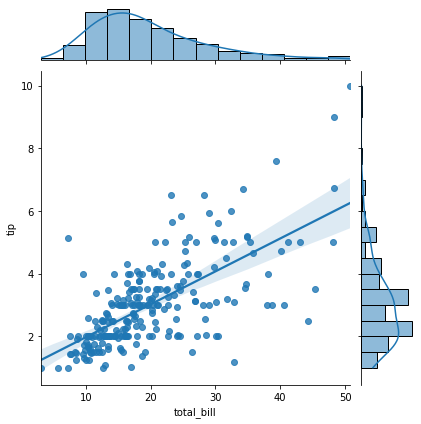

In [7]:
# O metodo joinplot cria plot de 2 variáveis com gráficos bivariados e univariados
sea.jointplot("total_bill", "tip", dados, kind = 'reg');

/home/leonardo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


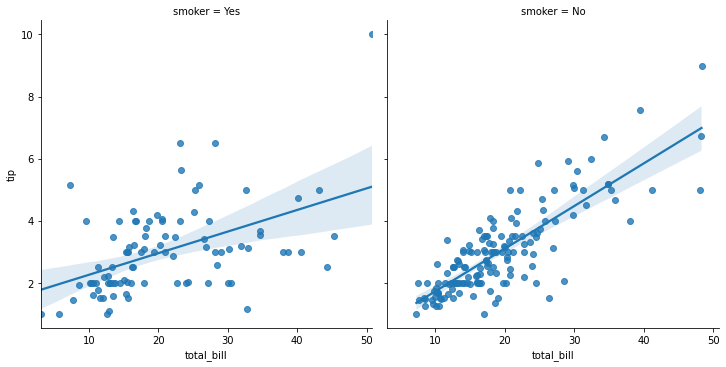

In [8]:
# O método lmplot() cria plot com dados e modelos de regressão
sea.lmplot("total_bill", "tip", dados, col = "smoker")

In [9]:
# Construindo um dataframe com Pandas
df = pd.DataFrame()

In [10]:
# Alimentando o Dataframe com valores aleatórios
df['a'] = random.sample(range(1, 100), 25)
df['b'] = random.sample(range(1,100), 25)

In [11]:
df.head()

,a,b
0,1,31
1,44,99
2,7,63
3,87,89
4,61,82


/home/leonardo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


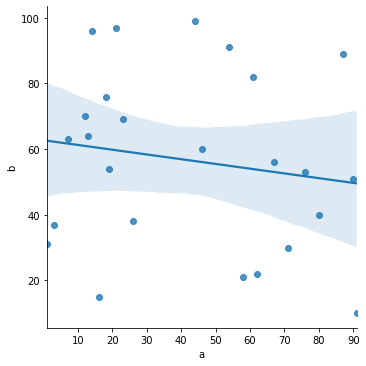

In [12]:
# Scatter Plot
sea.lmplot('a', 'b', data = df, fit_reg= True);

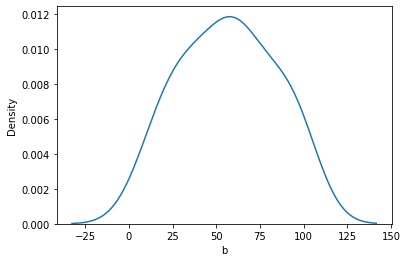

In [13]:
# Density Plot
sea.kdeplot(df.b);

/home/leonardo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


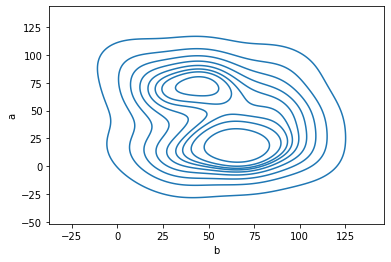

In [14]:
sea.kdeplot(df.b, df.a);

/home/leonardo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


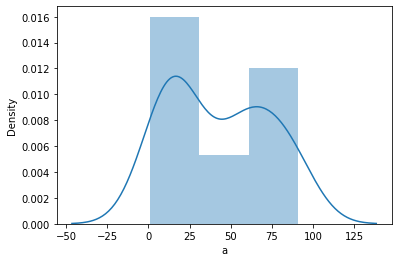

In [16]:
sea.distplot(df.a);

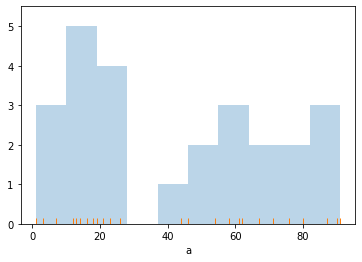

In [18]:
# Histograma
plt.hist(df.a, alpha = .3)
sea.rugplot(df.a);

In [30]:
# Box plot
sea.boxplot([df.b, df.a]);

/home/leonardo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [31]:
# Violin Plot
sea.violinplot([df.a, df.b]);

/home/leonardo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [ ]:
#04:12